# Package import

In [887]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
import matplotlib.pyplot as plt
from statistics import mode
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from six import StringIO
import pydotplus
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import metrics

# Ex. 1 - kNN - own implementation

In [888]:
db_iris = datasets.load_iris()

#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(db_iris.data, db_iris.target, test_size=0.3, random_state=0)

In [889]:
features_train

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.6, 3.4, 1.4, 0.3],
       [6.2, 2

In [890]:
labels_train

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [891]:
def kNN(k, features, labels):
    predicted_labels = labels.copy()
    n = features.shape[0]
    for i in range(n):
        dst = []
        for j in range(n):
            if j != i:
                dst.append((distance.euclidean(features[i], features[j]), j))
        dst.sort(key=lambda x: x[0])
        dst = dst[0:k]
        lab = [labels[idx] for d, idx in dst]
        predicted_labels[i] = mode(lab)
    return predicted_labels

def accuracy(true_labels, predicted_labels):
    all = 0
    good_pred = 0
    for t, p in zip(true_labels, predicted_labels):
        all += 1
        if t == p:
            good_pred += 1
    return (good_pred/all)*100

**Train set:**

In [892]:
k_list = []
acc_list = []
for k in range(features_train.shape[1], 105):
    if k % features_train.shape[1] != 0:
        predicted_labels = kNN(k, features_train, labels_train)
        acc = accuracy(labels_train, predicted_labels)
        k_list.append(k)
        acc_list.append(acc)

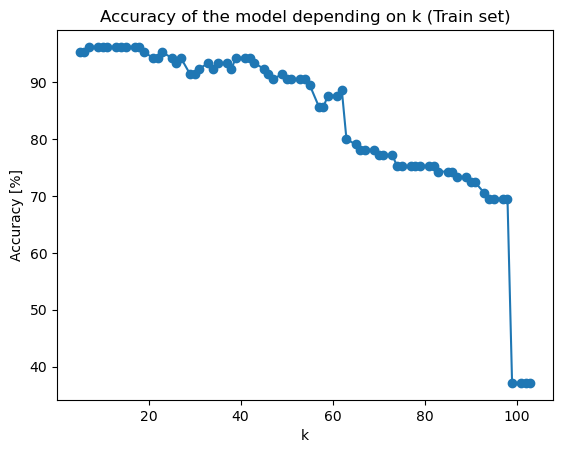

In [893]:
plt.plot(k_list, acc_list, 'o-')
plt.title('Accuracy of the model depending on k (Train set)')
plt.xlabel('k')
plt.ylabel('Accuracy [%]')
plt.show()

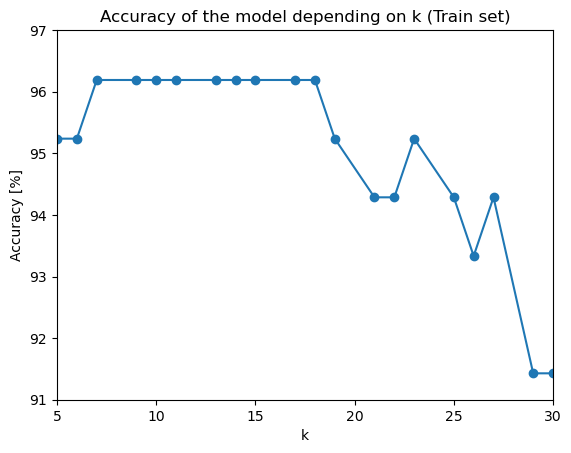

In [894]:
plt.plot(k_list, acc_list, 'o-')
plt.title('Accuracy of the model depending on k (Train set)')
plt.xlabel('k')
plt.ylabel('Accuracy [%]')
plt.xlim([5, 30])
plt.ylim([91, 97])
plt.show()

In [895]:
max_k = [k_list[i] for i, val in enumerate(acc_list) if val == max(acc_list)]
max_k # k values that give the biggest accuracy to the model (Train set)

[7, 9, 10, 11, 13, 14, 15, 17, 18]

**Test set:**

In [896]:
k_list = []
acc_list = []
for k in range(features_train.shape[1], 45):
    if k % features_train.shape[1] != 0:
        predicted_labels = kNN(k, features_test, labels_test)
        acc = accuracy(labels_test, predicted_labels)
        k_list.append(k)
        acc_list.append(acc)

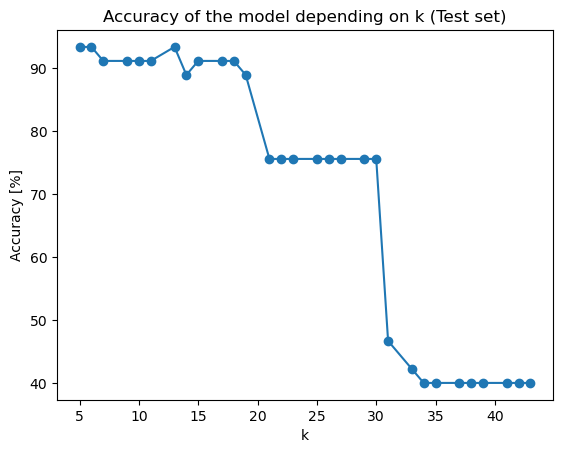

In [897]:
plt.plot(k_list, acc_list, 'o-')
plt.title('Accuracy of the model depending on k (Test set)')
plt.xlabel('k')
plt.ylabel('Accuracy [%]')
plt.show()

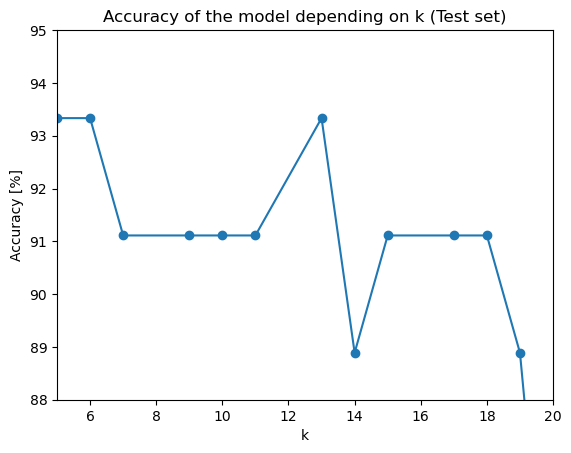

In [898]:
plt.plot(k_list, acc_list, 'o-')
plt.title('Accuracy of the model depending on k (Test set)')
plt.xlabel('k')
plt.ylabel('Accuracy [%]')
plt.xlim([5, 20])
plt.ylim([88, 95])
plt.show()

In [899]:
max_k = [k_list[i] for i, val in enumerate(acc_list) if val == max(acc_list)]
max_k # k values that give the biggest accuracy to the model (Test set)

[5, 6, 13]

# Ex. 2 - kNN - Python (sklearn)

**Train set:**

In [900]:
k_list = []
acc_list = []
for k in range(features_train.shape[1], 105):
    if k % features_train.shape[1] != 0:
        neigh = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        neigh.fit(features_train, labels_train)
        predicted_labels = neigh.predict(features_train)
        acc = accuracy(labels_train, predicted_labels)
        acc_list.append(acc)
        k_list.append(k)

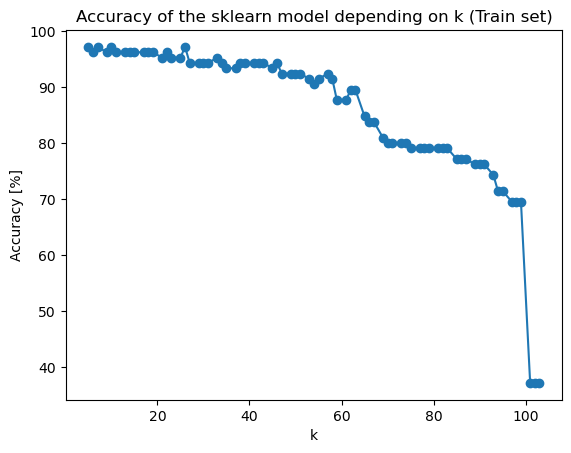

In [901]:
plt.plot(k_list, acc_list, 'o-')
plt.title('Accuracy of the sklearn model depending on k (Train set)')
plt.xlabel('k')
plt.ylabel('Accuracy [%]')
plt.show()

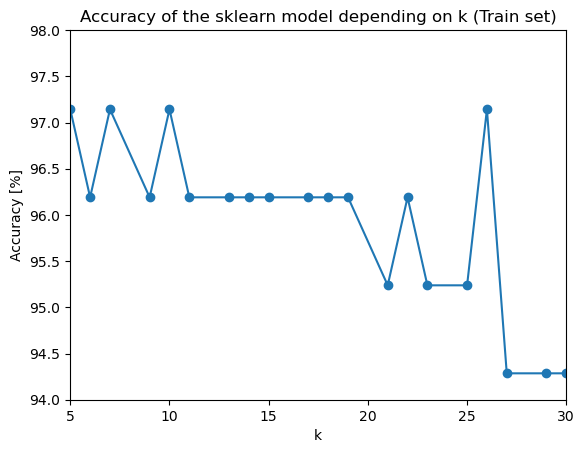

In [902]:
plt.plot(k_list, acc_list, 'o-')
plt.title('Accuracy of the sklearn model depending on k (Train set)')
plt.xlabel('k')
plt.ylabel('Accuracy [%]')
plt.xlim([5, 30])
plt.ylim([94, 98])
plt.show()

In [903]:
max_k = [k_list[i] for i, val in enumerate(acc_list) if val == max(acc_list)]
max_k # k values that give the biggest accuracy to the model (Train set)

[5, 7, 10, 26]

**Test set:**

In [904]:
k_list = []
acc_list = []
for k in range(features_test.shape[1], 45):
    if k % features_test.shape[1] != 0:
        neigh = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        neigh.fit(features_test, labels_test)
        predicted_labels = neigh.predict(features_test)
        acc = accuracy(labels_test, predicted_labels)
        acc_list.append(acc)
        k_list.append(k)

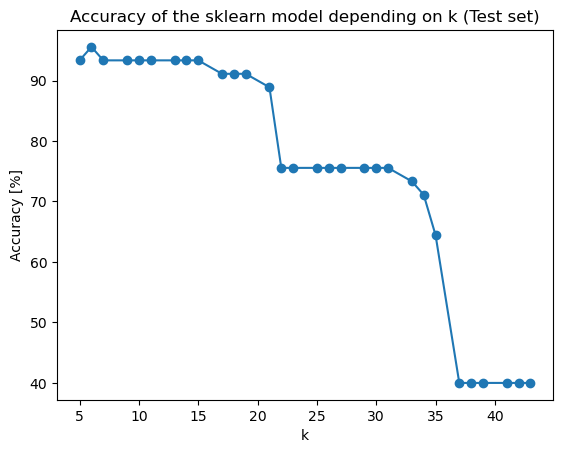

In [905]:
plt.plot(k_list, acc_list, 'o-')
plt.title('Accuracy of the sklearn model depending on k (Test set)')
plt.xlabel('k')
plt.ylabel('Accuracy [%]')
plt.show()

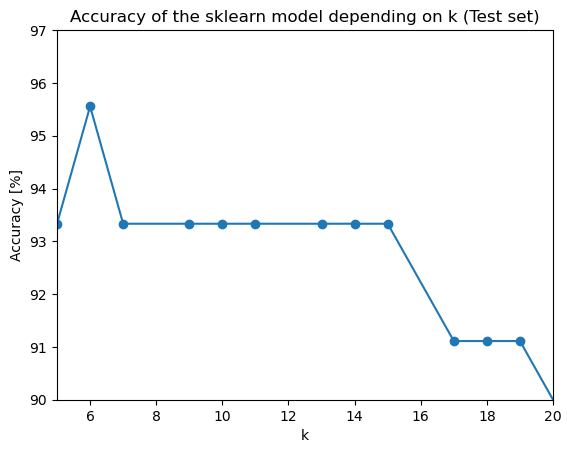

In [906]:
plt.plot(k_list, acc_list, 'o-')
plt.title('Accuracy of the sklearn model depending on k (Test set)')
plt.xlabel('k')
plt.ylabel('Accuracy [%]')
plt.xlim([5, 20])
plt.ylim([90, 97])
plt.show()

In [907]:
max_k = [k_list[i] for i, val in enumerate(acc_list) if val == max(acc_list)]
max_k # k values that give the biggest accuracy to the model (Test set)

[6]

Model from sklearn varies a little compared to my own implementation of the algorithm, but unfortunately I wasn't able to find a mistake in my implementation. I suspect it has something to do with finding the distance between unclassified point and its neighbours.

# Ex.3 - Decision trees

**Example - Iris dataset**

In [908]:
%%capture
clf = tree.DecisionTreeClassifier()
clf.fit(db_iris.data, db_iris.target)

In [909]:
clf.predict(db_iris.data[:1, :])

array([0])

In [910]:
clf.predict_proba(db_iris.data[:1, :])

array([[1., 0., 0.]])

In [911]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, class_names=db_iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("iris.pdf")

True

**Exercise**

In [912]:
# wczytywanie danych (np. z biblioteki keras)
dane = pd.read_csv("mnist_train.csv")

**Ex. 1. Divide the data into parameters X and answer y:**

In [913]:
X = dane.values[:,1:]
y = dane.values[:,0]

# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])

# Convert digit 10 -> 0 (error in the dataset)
y[np.where(y == 10)] = 0

# the height and width of the picture with the number
h = 28
w = 28

**Ex 2. Please display the number of digits and the number of pixels per image**

In [914]:
X.shape

(59999, 784)

In [915]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

**Ex. 3. Please display sample digits from the dataset (functionplot_mnist).**

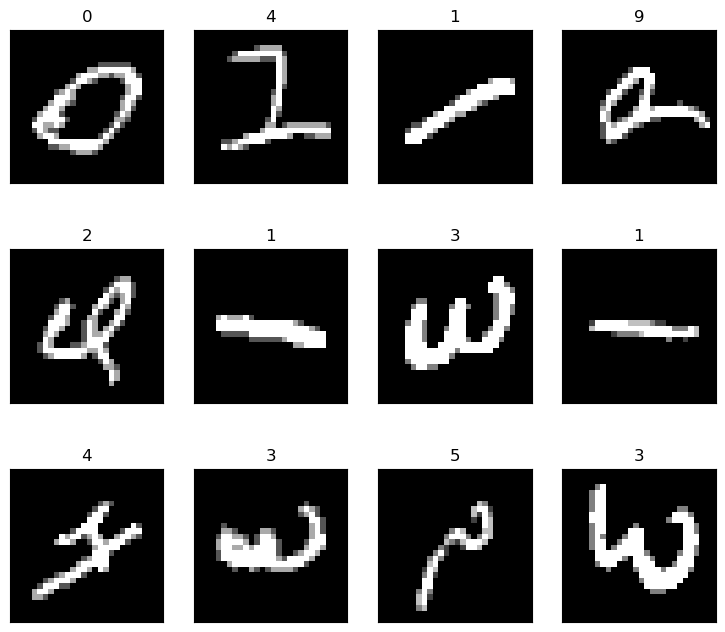

In [916]:
plot_mnist(X, [str(x) for x in y], h, w)

**Ex. 4. Please divide the dataset into learner (70%) and training.**

In [917]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

**Ex. 5. Create an instance of the classifier, then train and predict for test data.**

In [918]:
%%capture
clf = tree.DecisionTreeClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# dot_data = StringIO()
# tree.export_graphviz(clf, out_file=dot_data)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_pdf("mnist.pdf")

**Ex 6. Please provide F1 result, confusion matrix and classification report.**

In [919]:
f1_score(y_test, y_pred, average=None)

array([0.89516129, 0.94488189, 0.78091684, 0.77463582, 0.82045389,
       0.72537659, 0.86711253, 0.86825397, 0.78172293, 0.7595915 ])

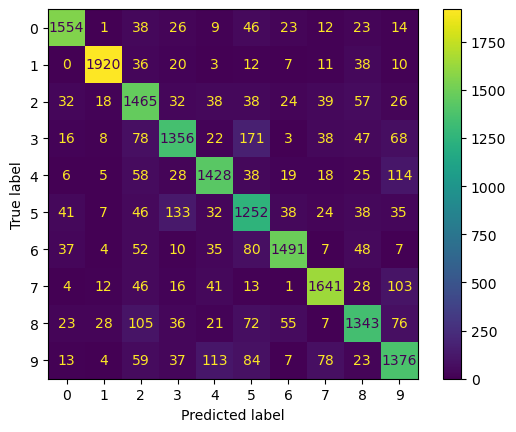

In [920]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
cm_display.plot()
plt.show()

In [921]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1746
           1       0.96      0.93      0.94      2057
           2       0.74      0.83      0.78      1769
           3       0.80      0.75      0.77      1807
           4       0.82      0.82      0.82      1739
           5       0.69      0.76      0.73      1646
           6       0.89      0.84      0.87      1771
           7       0.88      0.86      0.87      1905
           8       0.80      0.76      0.78      1766
           9       0.75      0.77      0.76      1794

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.83      0.82      0.82     18000

